In [1]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq
from qiskit.providers.fake_provider import *
import numpy as np 
import os

########## INPUT ############
f=5 # number of fake_backend want to choose
lower_limit= 3 # the lower limit of qubits for the circuit
upper_limit= 9 # the lower limit of qubits for the circuit
steps= 2 #jump in qubit numbers
name_of_algo='marmin_bell'

In [2]:
all_fakes=[FakeAlmadenV2,FakeArmonkV2,FakeAthensV2,FakeAuckland,FakeBelemV2,FakeBoeblingenV2,FakeBogotaV2,FakeBrooklynV2,FakeBurlingtonV2,FakeCairoV2,FakeCambridgeV2,FakeCasablancaV2,FakeEssexV2,FakeGeneva,FakeGuadalupeV2,FakeHanoiV2,FakeJakartaV2,FakeJohannesburgV2,FakeKolkataV2,FakeLagosV2,FakeLimaV2,FakeLondonV2,FakeManhattanV2,FakeManilaV2,FakeMelbourneV2,FakeMontrealV2,FakeMumbaiV2,FakeNairobiV2,FakeOslo,FakeOurenseV2,FakeParisV2,FakePerth,FakePrague,FakePoughkeepsieV2,FakeQuitoV2,FakeRochesterV2,FakeRomeV2,FakeSantiagoV2,FakeSherbrooke,FakeSingaporeV2,FakeSydneyV2,FakeTorontoV2,FakeValenciaV2,FakeVigoV2,FakeWashingtonV2,FakeYorktownV2]
import random; selected_fakes = random.sample(all_fakes, f)
selected_fakes  # having any randomly selected 5 fake backends out of 46 mentioned in the inital list

[qiskit.providers.fake_provider.backends.bogota.fake_bogota.FakeBogotaV2,
 qiskit.providers.fake_provider.backends.toronto.fake_toronto.FakeTorontoV2,
 qiskit.providers.fake_provider.backends.paris.fake_paris.FakeParisV2,
 qiskit.providers.fake_provider.backends.casablanca.fake_casablanca.FakeCasablancaV2,
 qiskit.providers.fake_provider.backends.lima.fake_lima.FakeLimaV2]

In [3]:
benchmarks=[]
for i in range(lower_limit,upper_limit,steps):
    label = name_of_algo+str(i)
    benchmarks.append((supermarq.mermin_bell.MerminBell(i),label))
for i in benchmarks:
    circuit=i[0].qiskit_circuit()
    print("--------------------------",i[1],"---------------------------")
    #circuit.draw(output="mpl")
    print(circuit.draw())

-------------------------- marmin_bell3 ---------------------------
      ┌──────────┐                         ┌───┐┌───┐┌───┐   ┌───┐     ┌─┐   
 q_0: ┤ Rx(-π/2) ├──■──────────────■───────┤ X ├┤ X ├┤ S ├─■─┤ H ├─────┤M├───
      └──────────┘┌─┴─┐     ┌───┐  │       └─┬─┘└─┬─┘└───┘ │ ├───┤┌───┐└╥┘┌─┐
 q_1: ────────────┤ X ├──■──┤ H ├──┼────■────┼────■────────■─┤ S ├┤ H ├─╫─┤M├
                  └───┘┌─┴─┐├───┤┌─┴─┐┌─┴─┐  │  ┌───┐┌───┐┌─┐└───┘└───┘ ║ └╥┘
 q_2: ─────────────────┤ X ├┤ H ├┤ X ├┤ X ├──■──┤ S ├┤ H ├┤M├───────────╫──╫─
                       └───┘└───┘└───┘└───┘     └───┘└───┘└╥┘           ║  ║ 
m0: 3/═════════════════════════════════════════════════════╩════════════╩══╩═
                                                           2            0  1 
-------------------------- marmin_bell5 ---------------------------
      ┌──────────┐                                                ┌───┐┌───┐»
 q_0: ┤ Rx(-π/2) ├──■────────────────────────■────────────────────┤ X ├┤ X ├»
      

In [4]:
benchmark_features = {}
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'marmin_bell3': [1.0, 1.0, 0.4375, 0.6666666666666666, 0.0, 0.11538461538461542], 'marmin_bell5': [1.0, 0.8947368421052632, 0.5588235294117647, 0.5043478260869565, 0.0, 0.11956521739130432], 'marmin_bell7': [1.0, 0.7714285714285715, 0.625, 0.42424242424242425, 0.0, 0.11616161616161617]}


In [5]:
jobs =[]
print("=============SCORES OF ALL THE CIRCUITS=============")    
for backend in selected_fakes:
    print("------------------------BACKEND-NAME :: ", backend().name)
    for benchmark, label in benchmarks:
        circuit=benchmark.qiskit_circuit()
        score_list=[]
        for i in range(0,5):
            job = backend().run(circuit, shots=1000)
            result=job.result()
            counts = job.result(0).get_counts()
            score = benchmark.score(counts)
            score_list.append(score)
        score = np.mean(score_list) 
        sd = np.std(score_list)
        print(label," :: ",score,"                       SD :: ",sd)
        #counts=job.result(0).count()
        jobs.append((label,benchmark,backend,job,score,sd))
#jobs

=============SCORES OF ALL THE CIRCUITS=============
------------------------BACKEND-NAME ::  fake_bogota
marmin_bell3  ::  0.488                        SD ::  0.004415880433163927
marmin_bell5  ::  0.4991                        SD ::  0.0012409673645990868
marmin_bell7  ::  0.499                        SD ::  0.0007071067811865482
------------------------BACKEND-NAME ::  fake_toronto
marmin_bell3  ::  0.4793                        SD ::  0.004864154602806115
marmin_bell5  ::  0.4967                        SD ::  0.0021118712081942895
marmin_bell7  ::  0.5009                        SD ::  0.002437211521390778
------------------------BACKEND-NAME ::  fake_paris
marmin_bell3  ::  0.4922000000000001                        SD ::  0.0018330302779823377
marmin_bell5  ::  0.49870000000000003                        SD ::  0.0006782329983125273
marmin_bell7  ::  0.4992                        SD ::  0.0006000000000000006
------------------------BACKEND-NAME ::  fake_casablanca
marmin_bell3  ::  

USED BACKEND:: fake_bogota ; CIRCUIT_NAME: marmin_bell3 ; SCORE = 0.488


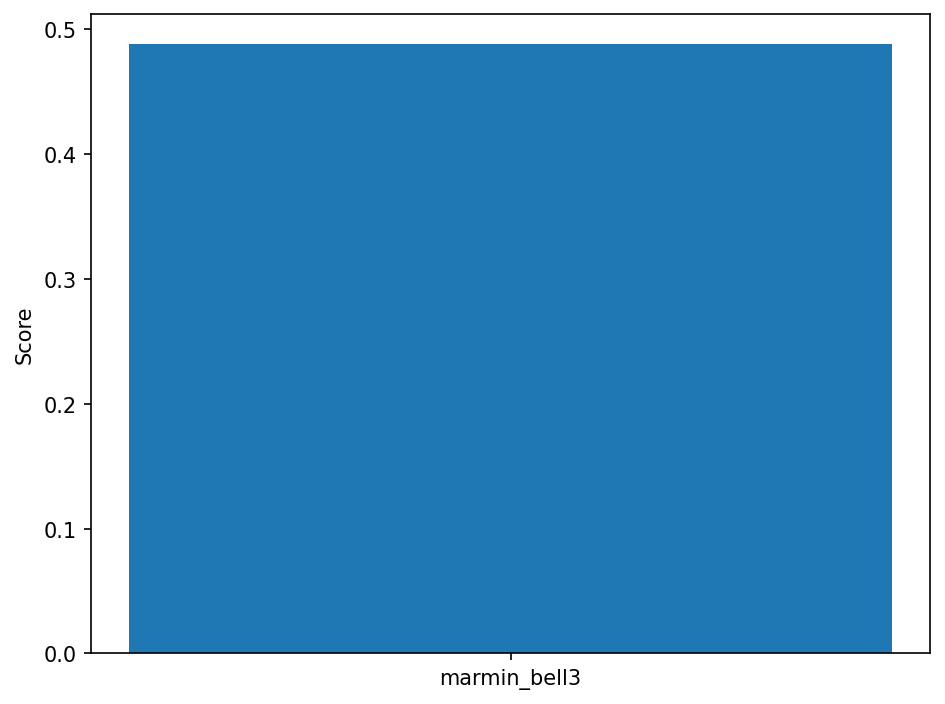

-----------------------------------------------------------
USED BACKEND:: fake_bogota ; CIRCUIT_NAME: marmin_bell5 ; SCORE = 0.4991


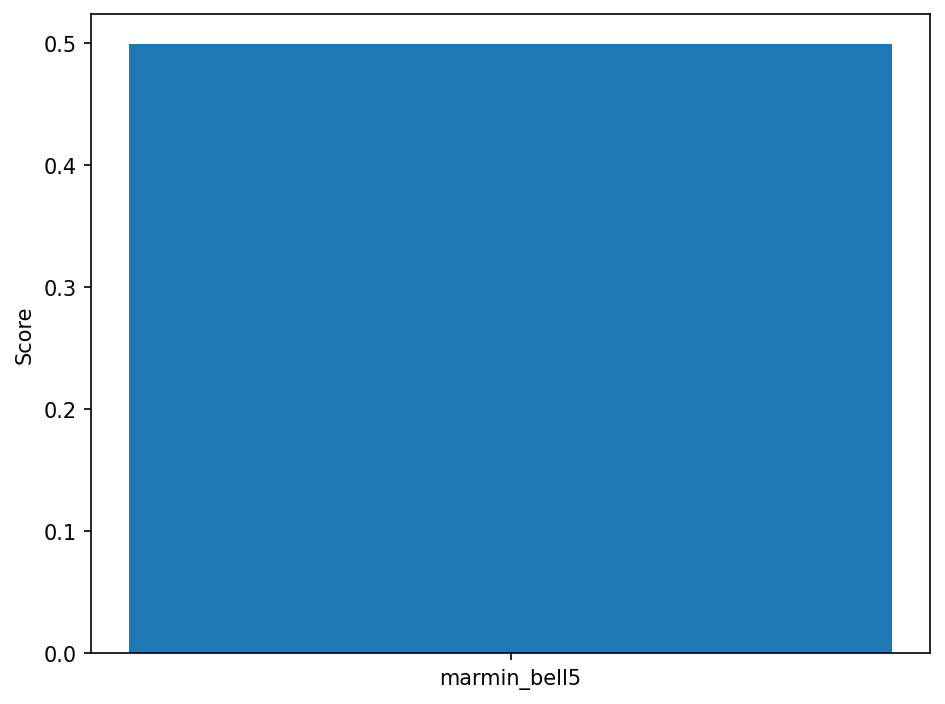

-----------------------------------------------------------
USED BACKEND:: fake_bogota ; CIRCUIT_NAME: marmin_bell7 ; SCORE = 0.499


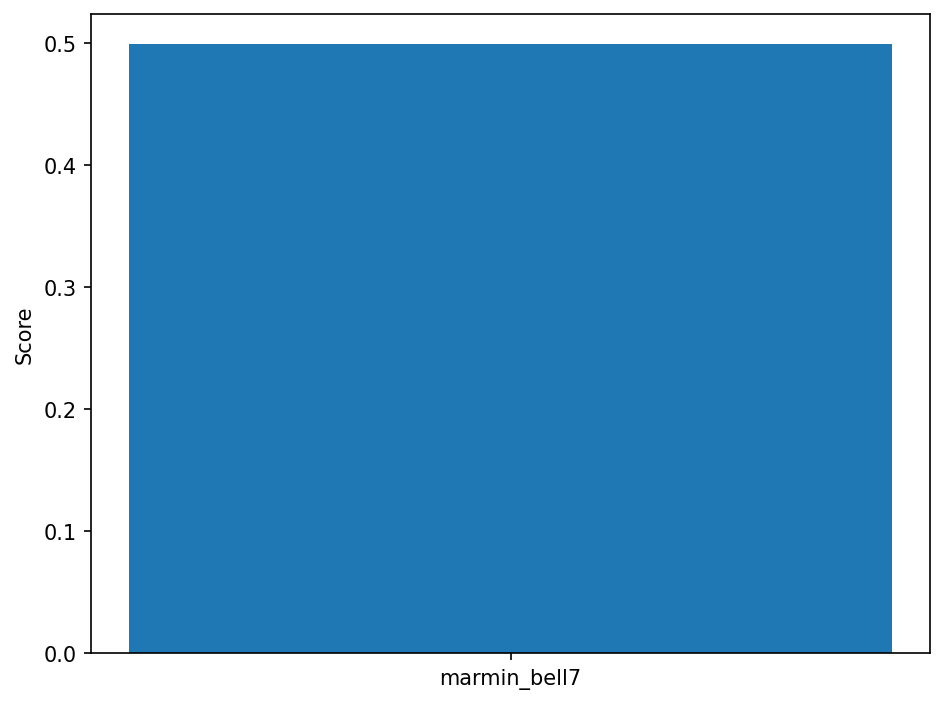

-----------------------------------------------------------
USED BACKEND:: fake_toronto ; CIRCUIT_NAME: marmin_bell3 ; SCORE = 0.4793


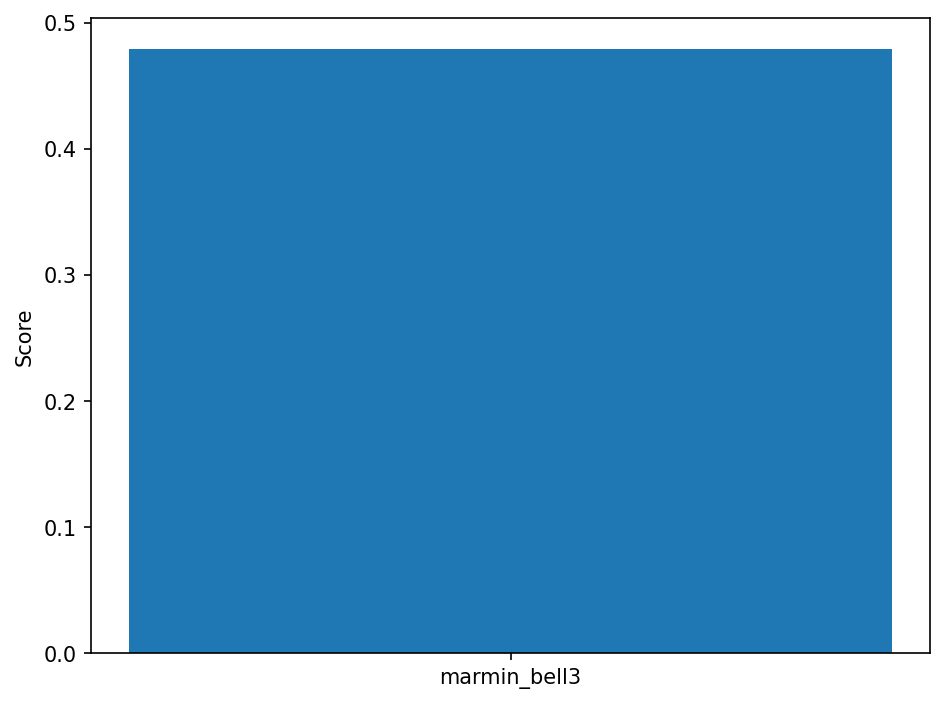

-----------------------------------------------------------
USED BACKEND:: fake_toronto ; CIRCUIT_NAME: marmin_bell5 ; SCORE = 0.4967


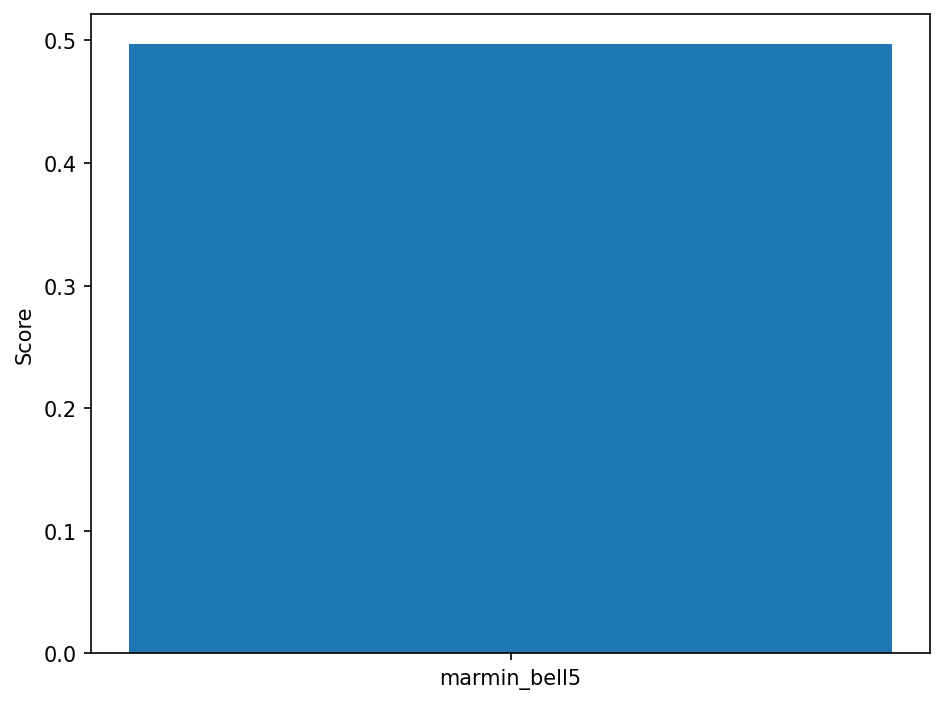

-----------------------------------------------------------
USED BACKEND:: fake_toronto ; CIRCUIT_NAME: marmin_bell7 ; SCORE = 0.5009


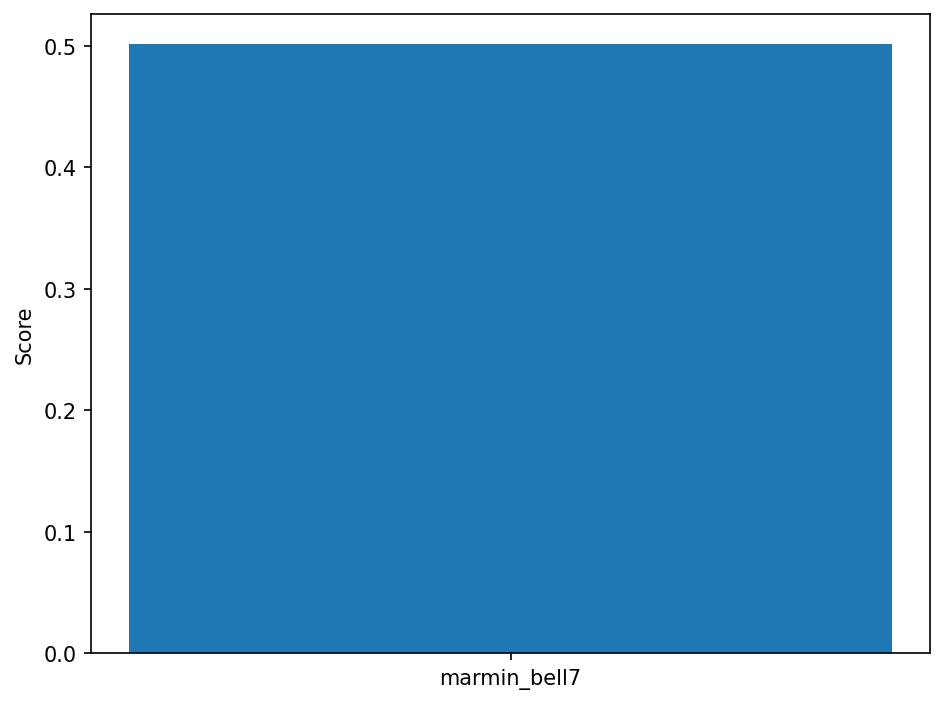

-----------------------------------------------------------
USED BACKEND:: fake_paris ; CIRCUIT_NAME: marmin_bell3 ; SCORE = 0.4922000000000001


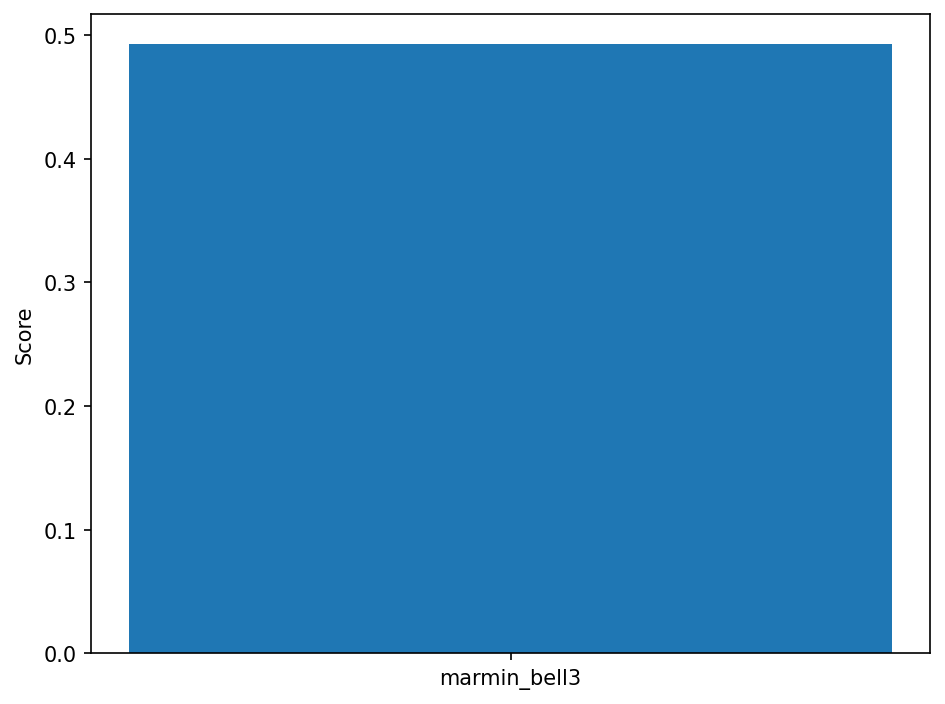

-----------------------------------------------------------
USED BACKEND:: fake_paris ; CIRCUIT_NAME: marmin_bell5 ; SCORE = 0.49870000000000003


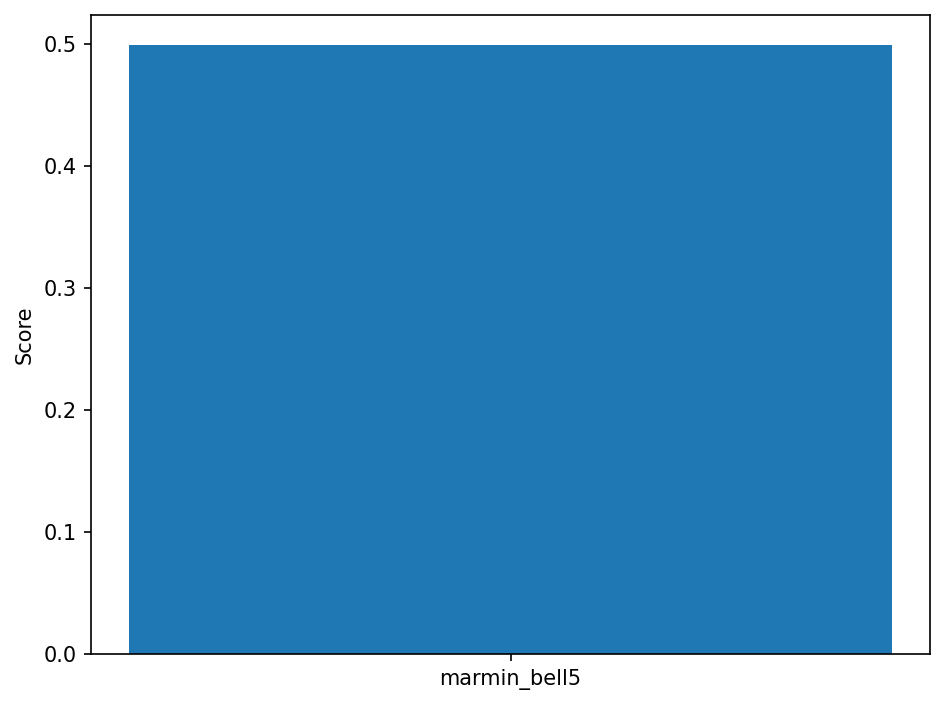

-----------------------------------------------------------
USED BACKEND:: fake_paris ; CIRCUIT_NAME: marmin_bell7 ; SCORE = 0.4992


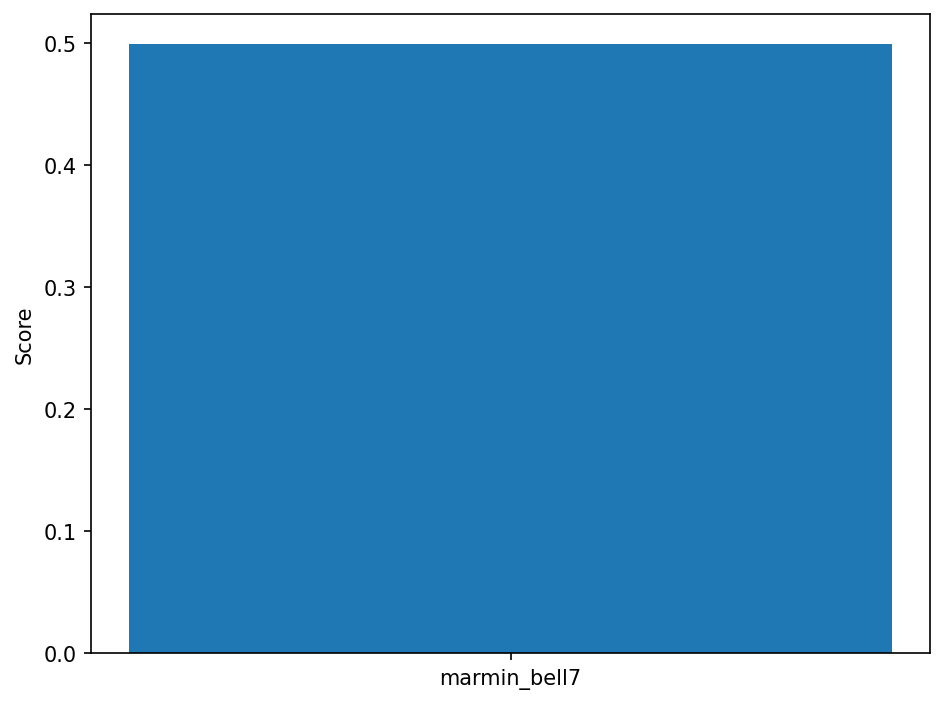

-----------------------------------------------------------
USED BACKEND:: fake_casablanca ; CIRCUIT_NAME: marmin_bell3 ; SCORE = 0.4946


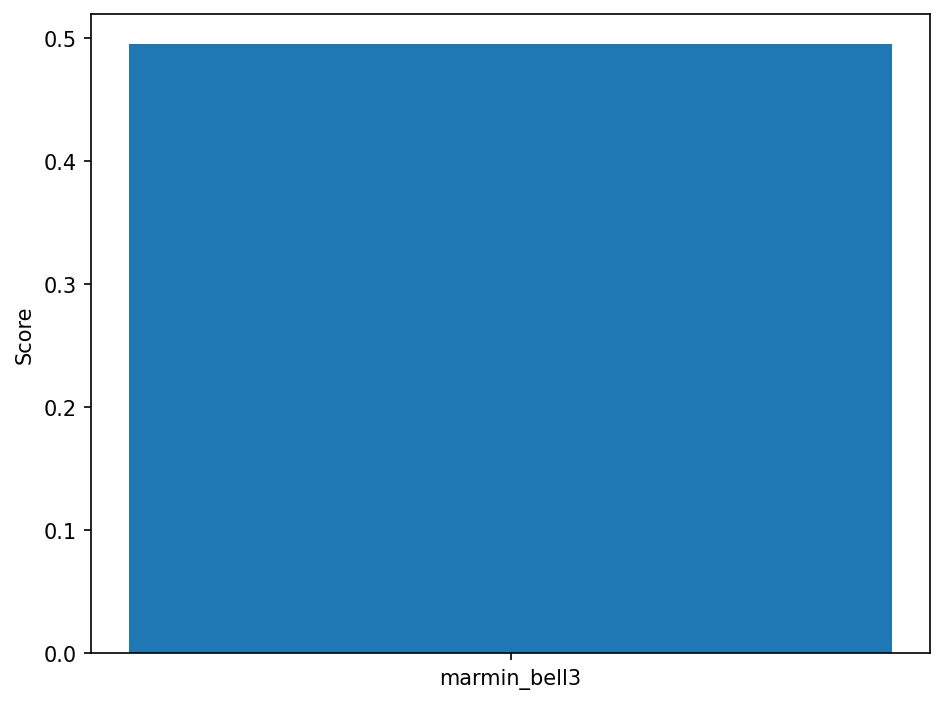

-----------------------------------------------------------
USED BACKEND:: fake_casablanca ; CIRCUIT_NAME: marmin_bell5 ; SCORE = 0.49929999999999997


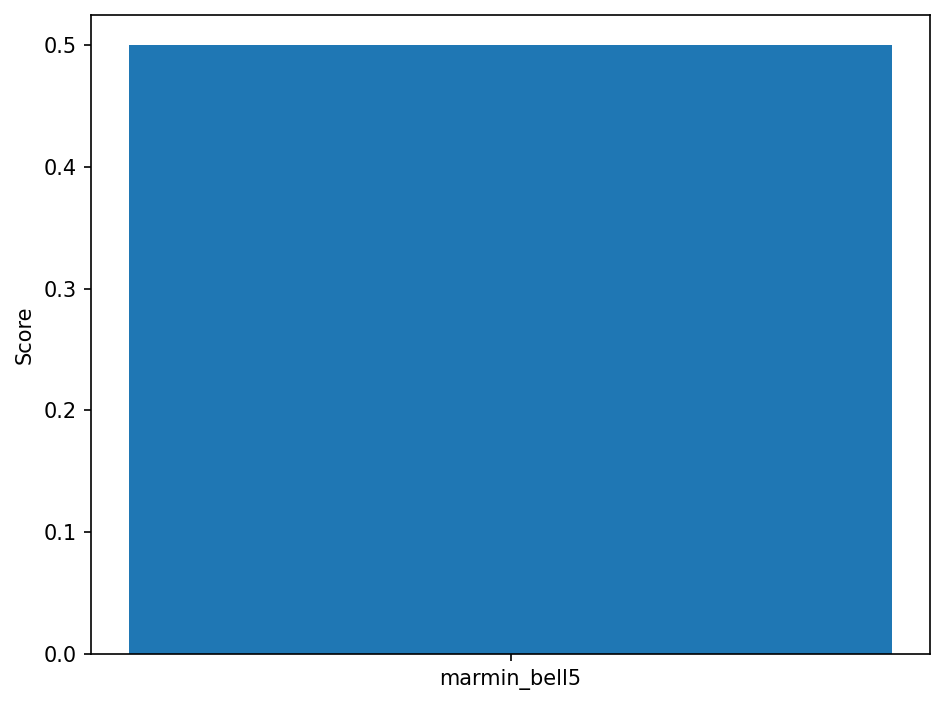

-----------------------------------------------------------
USED BACKEND:: fake_casablanca ; CIRCUIT_NAME: marmin_bell7 ; SCORE = 0.49959999999999993


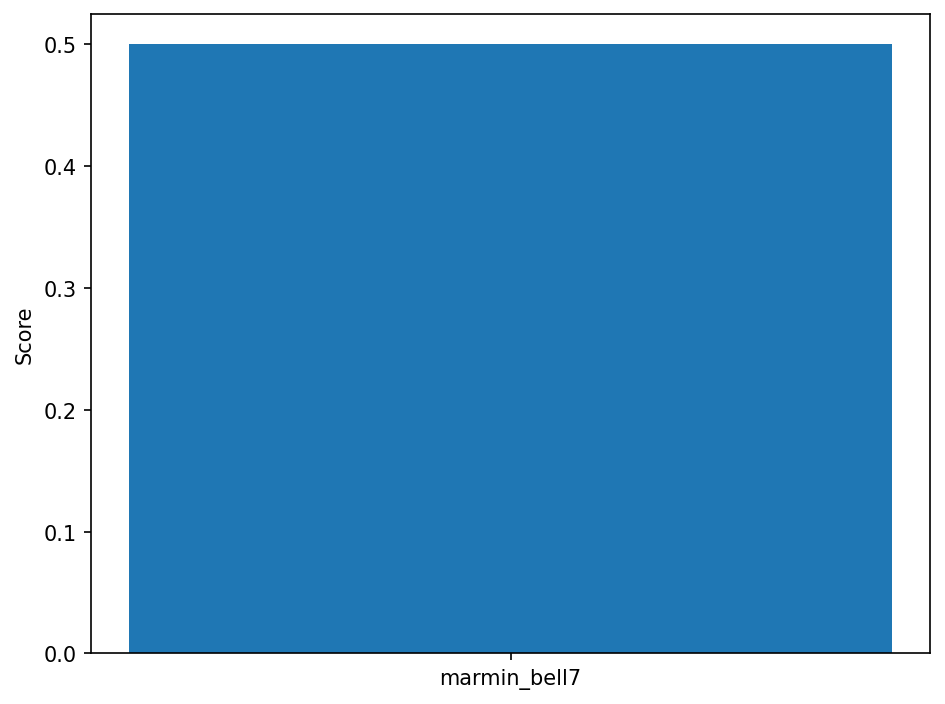

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: marmin_bell3 ; SCORE = 0.49399999999999994


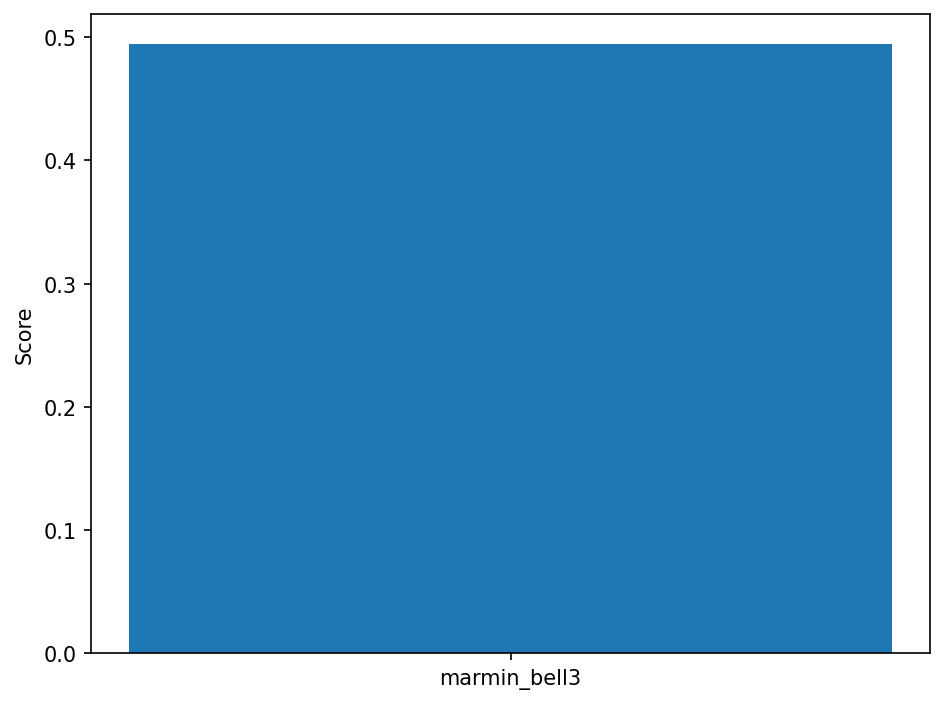

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: marmin_bell5 ; SCORE = 0.4995


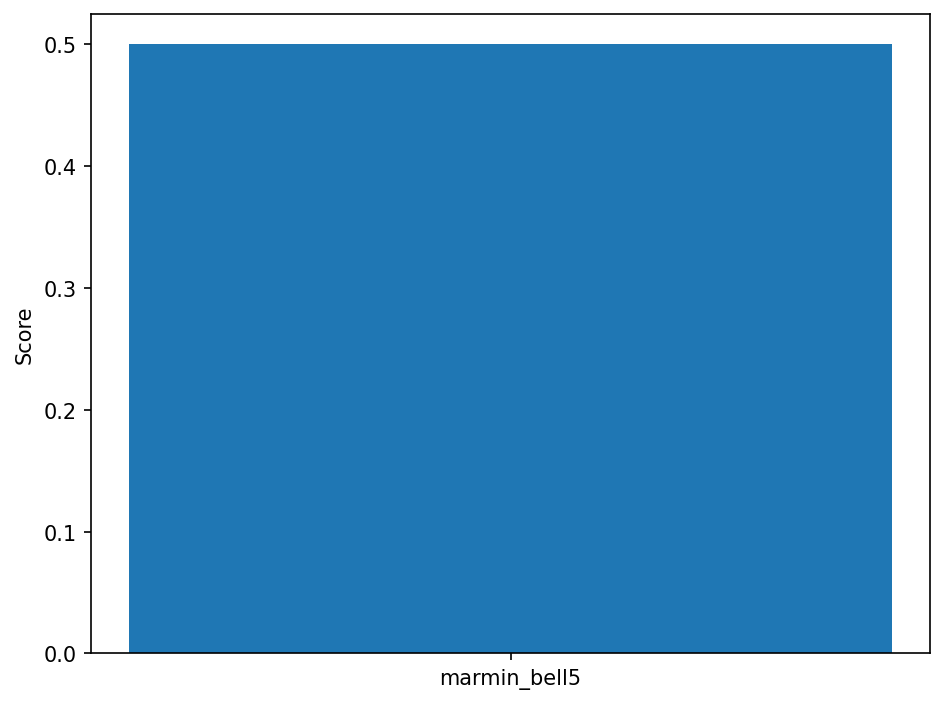

-----------------------------------------------------------
USED BACKEND:: fake_lima ; CIRCUIT_NAME: marmin_bell7 ; SCORE = 0.499


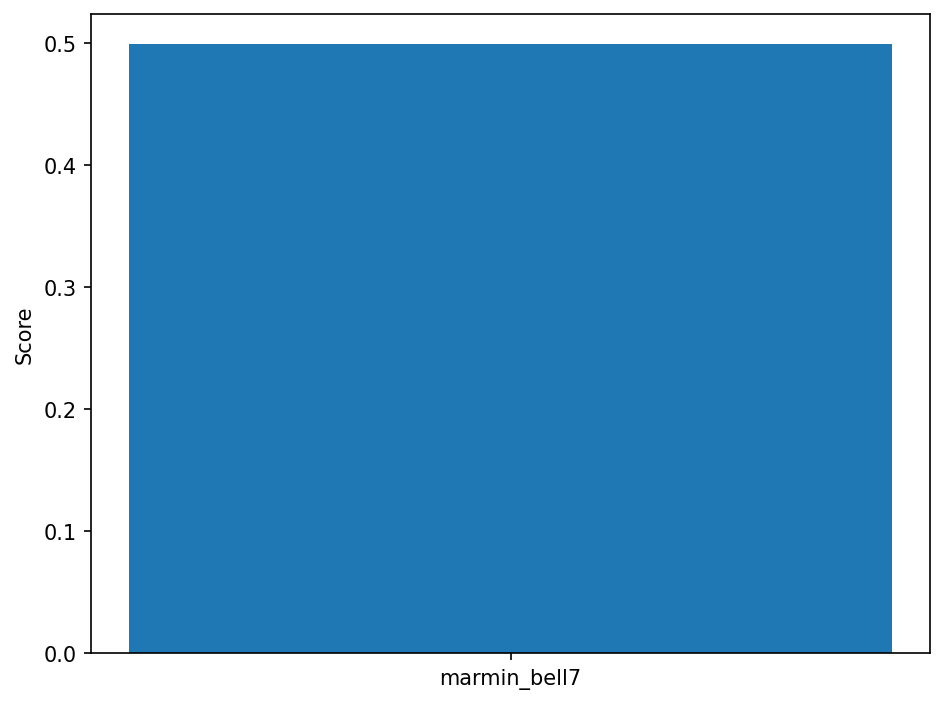

-----------------------------------------------------------


In [6]:
for label,benchmark,backend,job,score,sd in jobs:
    print("USED BACKEND::",backend().name,"; CIRCUIT_NAME:",label, "; SCORE =",score)
    supermarq.plotting.plot_results([score], [label])
    print("-----------------------------------------------------------")

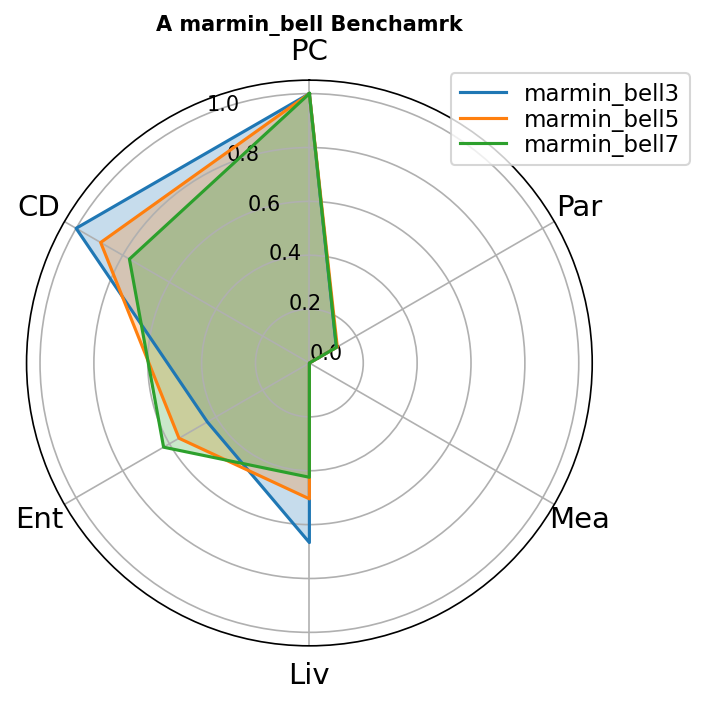

In [7]:
names=[]
scores=[]
X="A "+name_of_algo+' Benchamrk'
for i,j in benchmark_features.items():
    names.append(i)
    scores.append(j)
supermarq.plotting.plot_benchmark([X,names,scores],
        spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],show=True)

In [8]:
supermarq.plotting.plot_correlations(benchmark_features,all_fake_scores,["PC", "CD", "Ent", "Liv", "Mea", "Par"],device_name=all_fake_names,show=True,)

NameError: name 'all_fake_scores' is not defined

In [ ]:
supermarq.plotting.plot_results([score], ["ghz_qiskit_ibm_aer_DM_simulator"])

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np
all_fake_names=[]
all_score=[]
all_sd=[]
all_ckt=[]
for i in selected_fakes:
    all_fake_names.append(i().name)    
for benchmark, label in benchmarks:
    i=[]
    j=[]
    k=[]
    for ckt,benchmark,backend,job,score,sd in jobs:
        if ckt == label:
            i.append(score)
            j.append(sd)
    all_ckt.append(label)
    all_score.append(i)
    all_sd.append(j)
num_bars = len(all_score)
width = 0.1
x = np.arange(len(all_fake_names)) # x-axis positions for each bar
fig, ax = plt.subplots()
for i in range(num_bars):               # Create bars for each category with appropriate offsets
    ax.bar(x + i * width, all_score[i], width=width, label=f'Bar {i+1}', 
           yerr=all_sd[i],align='center',alpha=0.9,ecolor='black',capsize=2)
ax.set_xlabel('Name of Fake Backends',fontweight ='bold',fontsize = 12)
ax.set_ylabel('Scores',fontweight ='bold',fontsize = 12)
ax.set_title('Plot of GHZ over Multiple Qubits')
ax.set_xticks(x + (num_bars - 1) * width / 2)
ax.set_xticklabels(all_fake_names)
ax.legend(all_ckt,loc="lower left")
#ax.grid(True)
plt.show()